In [41]:
import pandas as pd
import os
import re

small_path = "../data/kalpha/sentiment/small/"
#df = pd.read_csv("../exp/kalpha/", index_col=0)

def get_df_dict(path):
    cells_df = {}
    for r, d, f in os.walk(path):
        for file in f:
            match = re.search(".*k:([^_]*).*a:([^_]*)", file)
            k=int(match.group(1))
            alfa=int(match.group(2))
            cells_df[(alfa, k)] = pd.read_csv(path + file)

    sk = list(cells_df.keys())
    sk.sort()
    
    return cells_df, sk

cells_df, sk = get_df_dict(small_path)

In [49]:
print(sk)
print(sk[0])
cells_df[sk[0]]
len([_ for (i,j) in sk if j==1500])

[(200, 1500), (200, 1525), (200, 1550), (200, 1575), (200, 1600), (200, 1625), (200, 1650), (200, 1675), (200, 1700), (200, 1725), (200, 1750), (200, 1775), (200, 1800), (250, 1500), (250, 1525), (250, 1550), (250, 1575), (250, 1600), (250, 1625), (250, 1650), (250, 1675), (250, 1700), (250, 1725), (250, 1750), (250, 1775), (250, 1800), (300, 1500), (300, 1525), (300, 1550), (300, 1575), (300, 1600), (300, 1625), (300, 1650), (300, 1675), (300, 1700), (300, 1725), (300, 1750), (300, 1775), (300, 1800), (350, 1500), (350, 1525), (350, 1550), (350, 1575), (350, 1600), (350, 1625), (350, 1650), (350, 1675), (350, 1700), (350, 1725), (350, 1750), (350, 1775), (350, 1800), (400, 1500), (400, 1525), (400, 1550), (400, 1575), (400, 1600), (400, 1625), (400, 1650), (400, 1675), (400, 1700), (400, 1725), (400, 1750), (400, 1775), (400, 1800), (450, 1500), (450, 1525), (450, 1550), (450, 1575), (450, 1600), (450, 1625), (450, 1650), (450, 1675), (450, 1700), (450, 1725), (450, 1750), (450, 1775)

11

In [61]:
import numpy as np

def to_numpy(data, rows, cols, d, sk):
    grid=[]
    for i in range(0,rows):
        row = []
        for j in range(0,cols):
            row.append(max(d[sk[i*cols + j]][data]))
        grid.append(row)
    
    return np.array(grid)


data=to_numpy('acc', 11, 13, cells_df, sk)
    

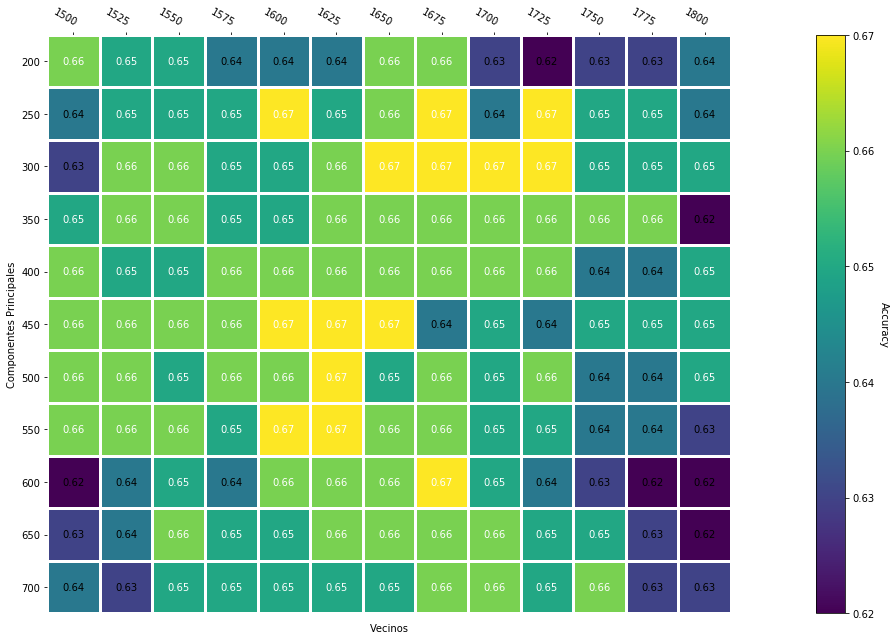

In [62]:
from heatmap import *

def fucking_plot_it(np_data, first_y, last_y, step_y, first_x, last_x, step_x):
    fig, ax = plt.subplots(figsize=(24,9))

    ax.set_xlabel('Vecinos')
    ax.set_ylabel('Componentes Principales')

    im, cbar = heatmap(np_data, [str(a) for a in range(first_y,last_y+step_y,step_y)]
                       , [str(k) for k in range(first_x, last_x+step_x, step_x)]
                       ,ax=ax, cbarlabel='Accuracy')
    texts = annotate_heatmap(im, valfmt="{x:.2f}")

    fig.tight_layout()
    plt.show()

cols, first_x, last_x, step_x = 13, 1500, 1800, 25
rows, first_y, last_y, step_y = 11, 200, 700, 50
data=to_numpy('acc', rows, cols, cells_df, sk)
fucking_plot_it(data, first_y, last_y, step_y, first_x, last_x, step_x)

In [63]:
# sanity check, del orden
print(max(cells_df[(400, 1625)]['acc']))
print(max(cells_df[(450, 1625)]['acc']))
print(max(cells_df[(500, 1625)]['acc']))
print(max(cells_df[(200, 1600)]['acc']))
print(max(cells_df[(250, 1600)]['acc']))


0.66
0.67
0.67
0.64
0.67


0.66
0.66
0.65
0.64


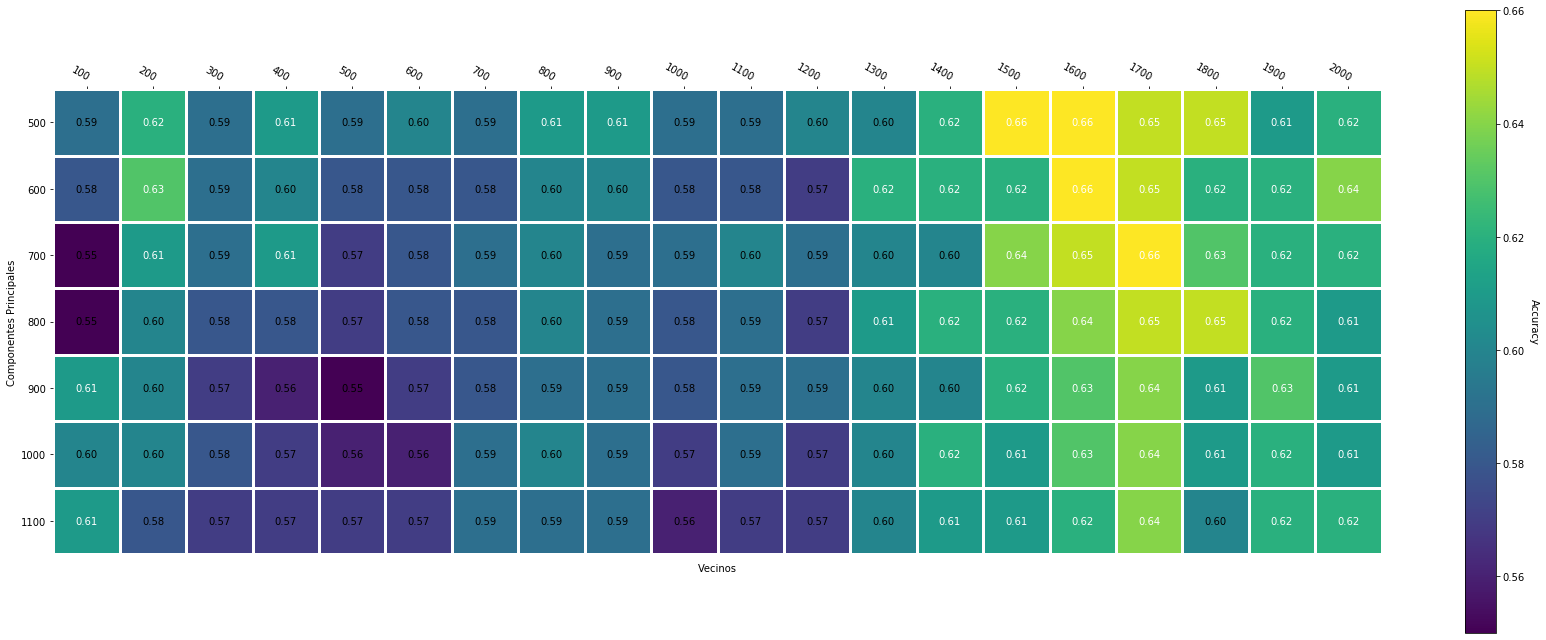

In [37]:
big_path = "../data/kalpha/sentiment/big/"
big_cells_df, big_sk = get_df_dict(big_path)

cols, first_x, last_x, step_x = 20, 100, 2000, 100
rows, first_y, last_y, step_y = 7, 500, 1100, 100

print(max(big_cells_df[(500,1600)]['acc']))
print(max(big_cells_df[(600,1600)]['acc']))
print(max(big_cells_df[(700,1600)]['acc']))
print(max(big_cells_df[(800,1600)]['acc']))

big_data=to_numpy('acc', rows, cols, big_cells_df, big_sk)
fucking_plot_it(big_data, first_y, last_y, step_y, first_x, last_x, step_x)

0.68
0.68


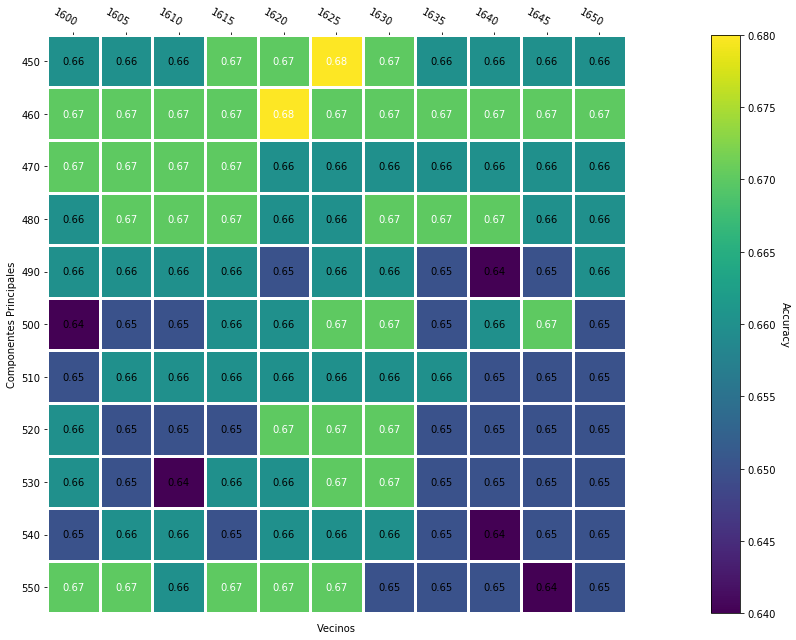

In [21]:
"""
explorando el primer valle del small
"""
big_path = "../data/kalpha/sentiment/smaller1/"
big_cells_df, big_sk = get_df_dict(big_path)

cols, first_x, last_x, step_x = 11, 1600, 1650, 5
rows, first_y, last_y, step_y = 11, 450, 550, 10

print(max(big_cells_df[(450,1625)]['acc']))
print(max(big_cells_df[(460,1620)]['acc']))

big_data=to_numpy('acc', rows, cols, big_cells_df, big_sk)
fucking_plot_it(big_data, first_y, last_y, step_y, first_x, last_x, step_x)

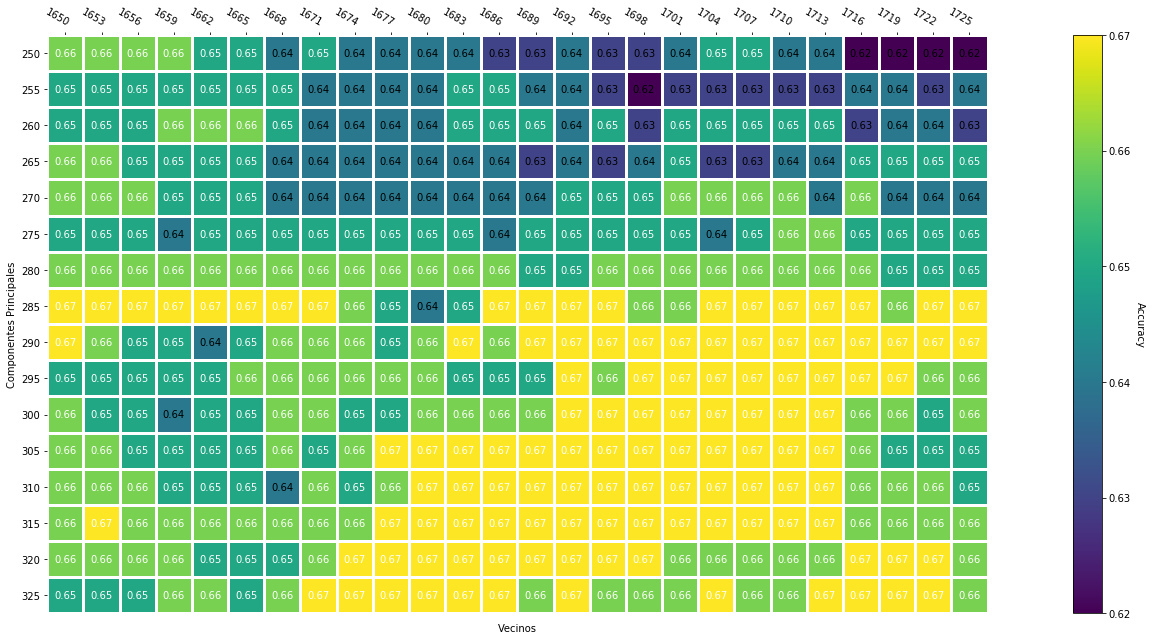

In [8]:
"""
explorando el segundo valle del small
"""
big_path = "../data/kalpha/sentiment/smaller2/"
big_cells_df, big_sk = get_df_dict(big_path)

cols, first_x, last_x, step_x = 26, 1650, 1725, 3
rows, first_y, last_y, step_y = 16, 250, 325, 5

big_data=to_numpy('acc', rows, cols, big_cells_df, big_sk)
fucking_plot_it(big_data, first_y, last_y, step_y, first_x, last_x, step_x)